## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  48.097870  1045.972405  0.154941  6.048277  1.321016
1  64.932113  1349.484318  0.865341  9.762036  1.517741
2  72.020769  1315.463826  0.468267  8.051303  1.454949
3  40.810735  1007.243333  0.060553  4.042461  0.985791
4  54.312489  1236.700721  0.239321  3.575622  1.536032


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.74044 | train_mse: 4.73939 | train_mae: 1.66499 |  0:00:00s
epoch 1  | loss: 0.81419 | train_mse: 4.01088 | train_mae: 1.52241 |  0:00:00s
epoch 2  | loss: 0.79227 | train_mse: 3.03242 | train_mae: 1.32032 |  0:00:00s


epoch 3  | loss: 0.74789 | train_mse: 3.18324 | train_mae: 1.296   |  0:00:00s
epoch 4  | loss: 0.71878 | train_mse: 1.87007 | train_mae: 1.00461 |  0:00:00s
epoch 5  | loss: 0.58579 | train_mse: 1.71728 | train_mae: 0.91608 |  0:00:00s


epoch 6  | loss: 0.49466 | train_mse: 1.73166 | train_mae: 0.90996 |  0:00:00s
epoch 7  | loss: 0.90354 | train_mse: 1.58418 | train_mae: 0.91928 |  0:00:00s
epoch 8  | loss: 0.58395 | train_mse: 1.68997 | train_mae: 0.99543 |  0:00:00s


epoch 9  | loss: 0.52895 | train_mse: 1.4869  | train_mae: 0.91618 |  0:00:01s
epoch 10 | loss: 0.45209 | train_mse: 1.12526 | train_mae: 0.77196 |  0:00:01s
epoch 11 | loss: 0.47939 | train_mse: 0.81774 | train_mae: 0.66399 |  0:00:01s


epoch 12 | loss: 0.55849 | train_mse: 0.44616 | train_mae: 0.49688 |  0:00:01s
epoch 13 | loss: 0.33179 | train_mse: 0.50328 | train_mae: 0.52056 |  0:00:01s
epoch 14 | loss: 0.53618 | train_mse: 0.53176 | train_mae: 0.53431 |  0:00:01s


epoch 15 | loss: 0.41629 | train_mse: 0.59008 | train_mae: 0.55468 |  0:00:01s
epoch 16 | loss: 0.26923 | train_mse: 0.44484 | train_mae: 0.4799  |  0:00:01s
epoch 17 | loss: 0.28684 | train_mse: 0.35253 | train_mae: 0.44085 |  0:00:01s


epoch 18 | loss: 0.38211 | train_mse: 0.28469 | train_mae: 0.41349 |  0:00:01s
epoch 19 | loss: 0.48809 | train_mse: 0.24167 | train_mae: 0.36942 |  0:00:01s
epoch 20 | loss: 0.24954 | train_mse: 0.36166 | train_mae: 0.40137 |  0:00:01s
epoch 21 | loss: 0.29921 | train_mse: 0.36063 | train_mae: 0.41911 |  0:00:01s


epoch 22 | loss: 0.26178 | train_mse: 0.21317 | train_mae: 0.35451 |  0:00:01s
epoch 23 | loss: 0.21607 | train_mse: 0.21218 | train_mae: 0.34432 |  0:00:02s
epoch 24 | loss: 0.24608 | train_mse: 0.29792 | train_mae: 0.38591 |  0:00:02s


epoch 25 | loss: 0.42343 | train_mse: 0.46878 | train_mae: 0.43708 |  0:00:02s
epoch 26 | loss: 0.34259 | train_mse: 0.41593 | train_mae: 0.4225  |  0:00:02s
epoch 27 | loss: 0.30757 | train_mse: 0.25347 | train_mae: 0.37014 |  0:00:02s


epoch 28 | loss: 0.59138 | train_mse: 0.21659 | train_mae: 0.32456 |  0:00:02s
epoch 29 | loss: 0.2799  | train_mse: 0.24084 | train_mae: 0.3401  |  0:00:02s
epoch 30 | loss: 0.35334 | train_mse: 0.22572 | train_mae: 0.35166 |  0:00:02s


epoch 31 | loss: 0.28203 | train_mse: 0.28216 | train_mae: 0.39551 |  0:00:02s
epoch 32 | loss: 0.29664 | train_mse: 0.28444 | train_mae: 0.39287 |  0:00:02s
epoch 33 | loss: 0.18179 | train_mse: 0.26145 | train_mae: 0.36731 |  0:00:02s


epoch 34 | loss: 0.49544 | train_mse: 0.25284 | train_mae: 0.3544  |  0:00:02s
epoch 35 | loss: 0.25394 | train_mse: 0.23454 | train_mae: 0.33806 |  0:00:02s
epoch 36 | loss: 0.24358 | train_mse: 0.17262 | train_mae: 0.30607 |  0:00:03s


epoch 37 | loss: 0.4638  | train_mse: 0.14635 | train_mae: 0.29854 |  0:00:03s


epoch 38 | loss: 0.25039 | train_mse: 0.14504 | train_mae: 0.28585 |  0:00:03s


epoch 39 | loss: 0.30315 | train_mse: 0.14493 | train_mae: 0.29434 |  0:00:03s


epoch 40 | loss: 0.21282 | train_mse: 0.14134 | train_mae: 0.28903 |  0:00:03s
epoch 41 | loss: 0.30299 | train_mse: 0.14063 | train_mae: 0.28663 |  0:00:04s


epoch 42 | loss: 0.1889  | train_mse: 0.12985 | train_mae: 0.27331 |  0:00:04s


epoch 43 | loss: 0.24789 | train_mse: 0.12925 | train_mae: 0.26204 |  0:00:04s


epoch 44 | loss: 0.19    | train_mse: 0.11972 | train_mae: 0.26112 |  0:00:05s
epoch 45 | loss: 0.45626 | train_mse: 0.13531 | train_mae: 0.27497 |  0:00:05s


epoch 46 | loss: 0.38397 | train_mse: 0.12957 | train_mae: 0.27537 |  0:00:05s
epoch 47 | loss: 0.21259 | train_mse: 0.13559 | train_mae: 0.2746  |  0:00:05s


epoch 48 | loss: 0.2744  | train_mse: 0.14085 | train_mae: 0.28812 |  0:00:05s


epoch 49 | loss: 0.20379 | train_mse: 0.12481 | train_mae: 0.26624 |  0:00:06s


epoch 50 | loss: 0.17721 | train_mse: 0.15554 | train_mae: 0.28597 |  0:00:06s


epoch 51 | loss: 0.17231 | train_mse: 0.14439 | train_mae: 0.2681  |  0:00:06s
epoch 52 | loss: 0.25012 | train_mse: 0.13355 | train_mae: 0.27494 |  0:00:06s


epoch 53 | loss: 0.18687 | train_mse: 0.15292 | train_mae: 0.28499 |  0:00:06s


epoch 54 | loss: 0.24905 | train_mse: 0.1657  | train_mae: 0.29431 |  0:00:07s
epoch 55 | loss: 0.16211 | train_mse: 0.13825 | train_mae: 0.28018 |  0:00:07s


epoch 56 | loss: 0.15702 | train_mse: 0.13607 | train_mae: 0.27671 |  0:00:07s
epoch 57 | loss: 0.30092 | train_mse: 0.15909 | train_mae: 0.30336 |  0:00:07s


epoch 58 | loss: 0.25258 | train_mse: 0.19707 | train_mae: 0.32962 |  0:00:07s


epoch 59 | loss: 0.32629 | train_mse: 0.21685 | train_mae: 0.34459 |  0:00:08s
epoch 60 | loss: 0.29991 | train_mse: 0.20874 | train_mae: 0.3348  |  0:00:08s
epoch 61 | loss: 0.21551 | train_mse: 0.20922 | train_mae: 0.34741 |  0:00:08s


epoch 62 | loss: 0.25303 | train_mse: 0.2003  | train_mae: 0.32702 |  0:00:08s
epoch 63 | loss: 0.20697 | train_mse: 0.12377 | train_mae: 0.26755 |  0:00:08s


epoch 64 | loss: 0.21024 | train_mse: 0.13523 | train_mae: 0.2772  |  0:00:08s
epoch 65 | loss: 0.24231 | train_mse: 0.14849 | train_mae: 0.28183 |  0:00:08s
epoch 66 | loss: 0.18971 | train_mse: 0.21198 | train_mae: 0.32711 |  0:00:08s


epoch 67 | loss: 0.23082 | train_mse: 0.23867 | train_mae: 0.34479 |  0:00:08s
epoch 68 | loss: 0.1651  | train_mse: 0.30342 | train_mae: 0.37197 |  0:00:09s


epoch 69 | loss: 0.17039 | train_mse: 0.18924 | train_mae: 0.31627 |  0:00:09s


epoch 70 | loss: 0.46838 | train_mse: 0.12033 | train_mae: 0.27615 |  0:00:09s
epoch 71 | loss: 0.13942 | train_mse: 0.11371 | train_mae: 0.25899 |  0:00:10s


epoch 72 | loss: 0.13692 | train_mse: 0.11568 | train_mae: 0.26649 |  0:00:10s
epoch 73 | loss: 0.22833 | train_mse: 0.1788  | train_mae: 0.31441 |  0:00:10s
epoch 74 | loss: 0.14985 | train_mse: 0.24809 | train_mae: 0.34279 |  0:00:10s
epoch 75 | loss: 0.13709 | train_mse: 0.24114 | train_mae: 0.32969 |  0:00:10s


epoch 76 | loss: 0.14865 | train_mse: 0.13189 | train_mae: 0.26683 |  0:00:10s
epoch 77 | loss: 0.15649 | train_mse: 0.08686 | train_mae: 0.23165 |  0:00:10s
epoch 78 | loss: 0.26725 | train_mse: 0.09216 | train_mae: 0.23576 |  0:00:10s


epoch 79 | loss: 0.21953 | train_mse: 0.11666 | train_mae: 0.25188 |  0:00:10s
epoch 80 | loss: 0.14387 | train_mse: 0.10183 | train_mae: 0.24872 |  0:00:10s
epoch 81 | loss: 0.12891 | train_mse: 0.09842 | train_mae: 0.23942 |  0:00:10s


epoch 82 | loss: 0.21018 | train_mse: 0.11334 | train_mae: 0.24142 |  0:00:10s
epoch 83 | loss: 0.11534 | train_mse: 0.10721 | train_mae: 0.23275 |  0:00:10s
epoch 84 | loss: 0.16484 | train_mse: 0.08767 | train_mae: 0.22585 |  0:00:11s


epoch 85 | loss: 0.11797 | train_mse: 0.07014 | train_mae: 0.20668 |  0:00:11s
epoch 86 | loss: 0.23595 | train_mse: 0.11033 | train_mae: 0.24325 |  0:00:11s
epoch 87 | loss: 0.24483 | train_mse: 0.11918 | train_mae: 0.25205 |  0:00:11s
epoch 88 | loss: 0.14414 | train_mse: 0.13835 | train_mae: 0.26718 |  0:00:11s


epoch 89 | loss: 0.09909 | train_mse: 0.11409 | train_mae: 0.24109 |  0:00:11s
epoch 90 | loss: 0.11556 | train_mse: 0.07256 | train_mae: 0.20407 |  0:00:11s
epoch 91 | loss: 0.24657 | train_mse: 0.07769 | train_mae: 0.2181  |  0:00:11s


epoch 92 | loss: 0.32353 | train_mse: 0.1029  | train_mae: 0.24093 |  0:00:11s
epoch 93 | loss: 0.14674 | train_mse: 0.16922 | train_mae: 0.28212 |  0:00:11s
epoch 94 | loss: 0.11083 | train_mse: 0.22813 | train_mae: 0.30998 |  0:00:11s


epoch 95 | loss: 0.32301 | train_mse: 0.22702 | train_mae: 0.30302 |  0:00:11s
epoch 96 | loss: 0.24938 | train_mse: 0.17629 | train_mae: 0.27003 |  0:00:11s
epoch 97 | loss: 0.1196  | train_mse: 0.17251 | train_mae: 0.27058 |  0:00:12s


epoch 98 | loss: 0.17482 | train_mse: 0.16325 | train_mae: 0.26973 |  0:00:12s
epoch 99 | loss: 0.12058 | train_mse: 0.12542 | train_mae: 0.24858 |  0:00:12s
epoch 100| loss: 0.30641 | train_mse: 0.10367 | train_mae: 0.23565 |  0:00:12s


epoch 101| loss: 0.12596 | train_mse: 0.11509 | train_mae: 0.23998 |  0:00:12s
epoch 102| loss: 0.12168 | train_mse: 0.14615 | train_mae: 0.2606  |  0:00:12s


epoch 103| loss: 0.14477 | train_mse: 0.17216 | train_mae: 0.27674 |  0:00:12s
epoch 104| loss: 0.12562 | train_mse: 0.14051 | train_mae: 0.26047 |  0:00:12s
epoch 105| loss: 0.34602 | train_mse: 0.09073 | train_mae: 0.22615 |  0:00:12s


epoch 106| loss: 0.10604 | train_mse: 0.08699 | train_mae: 0.22449 |  0:00:12s
epoch 107| loss: 0.25758 | train_mse: 0.0888  | train_mae: 0.22032 |  0:00:12s
epoch 108| loss: 0.12203 | train_mse: 0.09043 | train_mae: 0.22236 |  0:00:12s
epoch 109| loss: 0.24169 | train_mse: 0.08622 | train_mae: 0.2187  |  0:00:13s


epoch 110| loss: 0.14394 | train_mse: 0.19492 | train_mae: 0.25825 |  0:00:13s
epoch 111| loss: 0.36188 | train_mse: 0.33593 | train_mae: 0.35647 |  0:00:13s
epoch 112| loss: 0.15805 | train_mse: 0.21547 | train_mae: 0.33127 |  0:00:13s
epoch 113| loss: 0.10628 | train_mse: 0.15735 | train_mae: 0.29135 |  0:00:13s


epoch 114| loss: 0.13087 | train_mse: 0.07281 | train_mae: 0.21004 |  0:00:13s
epoch 115| loss: 0.12031 | train_mse: 0.07475 | train_mae: 0.20901 |  0:00:13s
epoch 116| loss: 0.08471 | train_mse: 0.14318 | train_mae: 0.27288 |  0:00:13s


epoch 117| loss: 0.18433 | train_mse: 0.17679 | train_mae: 0.29834 |  0:00:13s
epoch 118| loss: 0.13754 | train_mse: 0.09077 | train_mae: 0.21776 |  0:00:13s
epoch 119| loss: 0.09607 | train_mse: 0.06681 | train_mae: 0.18344 |  0:00:13s


epoch 120| loss: 0.12484 | train_mse: 0.08318 | train_mae: 0.20655 |  0:00:13s
epoch 121| loss: 0.26972 | train_mse: 0.06996 | train_mae: 0.19605 |  0:00:13s
epoch 122| loss: 0.11384 | train_mse: 0.08578 | train_mae: 0.21485 |  0:00:13s
epoch 123| loss: 0.3041  | train_mse: 0.26115 | train_mae: 0.28291 |  0:00:13s


epoch 124| loss: 0.09326 | train_mse: 0.32022 | train_mae: 0.29671 |  0:00:14s


epoch 125| loss: 0.39287 | train_mse: 0.12632 | train_mae: 0.26711 |  0:00:14s


epoch 126| loss: 0.33655 | train_mse: 0.12134 | train_mae: 0.27352 |  0:00:14s
epoch 127| loss: 0.36871 | train_mse: 0.09784 | train_mae: 0.24997 |  0:00:14s
epoch 128| loss: 0.16071 | train_mse: 0.08256 | train_mae: 0.22463 |  0:00:14s


epoch 129| loss: 0.16397 | train_mse: 0.08318 | train_mae: 0.22373 |  0:00:14s
epoch 130| loss: 0.16821 | train_mse: 0.09058 | train_mae: 0.22929 |  0:00:14s
epoch 131| loss: 0.209   | train_mse: 0.09754 | train_mae: 0.23219 |  0:00:14s


epoch 132| loss: 0.27645 | train_mse: 0.1176  | train_mae: 0.25566 |  0:00:15s
epoch 133| loss: 0.53166 | train_mse: 0.16854 | train_mae: 0.28749 |  0:00:15s
epoch 134| loss: 0.12256 | train_mse: 0.19349 | train_mae: 0.30101 |  0:00:15s


epoch 135| loss: 0.27384 | train_mse: 0.19515 | train_mae: 0.30098 |  0:00:15s
epoch 136| loss: 0.21621 | train_mse: 0.17469 | train_mae: 0.28602 |  0:00:15s
epoch 137| loss: 0.09824 | train_mse: 0.15727 | train_mae: 0.27392 |  0:00:15s


epoch 138| loss: 0.14345 | train_mse: 0.13629 | train_mae: 0.26171 |  0:00:15s
epoch 139| loss: 0.23319 | train_mse: 0.12246 | train_mae: 0.24689 |  0:00:15s
epoch 140| loss: 0.17854 | train_mse: 0.15349 | train_mae: 0.2723  |  0:00:15s


epoch 141| loss: 0.28316 | train_mse: 0.20113 | train_mae: 0.30688 |  0:00:15s
epoch 142| loss: 0.15681 | train_mse: 0.20077 | train_mae: 0.29938 |  0:00:15s


epoch 143| loss: 0.19912 | train_mse: 0.30146 | train_mae: 0.34028 |  0:00:16s
epoch 144| loss: 0.11555 | train_mse: 0.33363 | train_mae: 0.34552 |  0:00:16s


epoch 145| loss: 0.12947 | train_mse: 0.30298 | train_mae: 0.33742 |  0:00:16s


epoch 146| loss: 0.19727 | train_mse: 0.22776 | train_mae: 0.31688 |  0:00:16s
epoch 147| loss: 0.16573 | train_mse: 0.20996 | train_mae: 0.30206 |  0:00:16s


epoch 148| loss: 0.19045 | train_mse: 0.2408  | train_mae: 0.32546 |  0:00:17s
epoch 149| loss: 0.11362 | train_mse: 0.28613 | train_mae: 0.34342 |  0:00:17s


epoch 150| loss: 0.12616 | train_mse: 0.29609 | train_mae: 0.33746 |  0:00:17s


epoch 151| loss: 0.13964 | train_mse: 0.29515 | train_mae: 0.33809 |  0:00:17s
epoch 152| loss: 0.10358 | train_mse: 0.2386  | train_mae: 0.32548 |  0:00:17s


epoch 153| loss: 0.12529 | train_mse: 0.20133 | train_mae: 0.30846 |  0:00:18s


epoch 154| loss: 0.10049 | train_mse: 0.16646 | train_mae: 0.2859  |  0:00:18s


epoch 155| loss: 0.17033 | train_mse: 0.13778 | train_mae: 0.25867 |  0:00:18s
epoch 156| loss: 0.23947 | train_mse: 0.13129 | train_mae: 0.25684 |  0:00:19s


epoch 157| loss: 0.12328 | train_mse: 0.11382 | train_mae: 0.25321 |  0:00:19s
epoch 158| loss: 0.1032  | train_mse: 0.11126 | train_mae: 0.24551 |  0:00:19s
epoch 159| loss: 0.26425 | train_mse: 0.11891 | train_mae: 0.24665 |  0:00:19s


epoch 160| loss: 0.1209  | train_mse: 0.09859 | train_mae: 0.23108 |  0:00:19s
epoch 161| loss: 0.1777  | train_mse: 0.08553 | train_mae: 0.22682 |  0:00:20s


epoch 162| loss: 0.19813 | train_mse: 0.08218 | train_mae: 0.22169 |  0:00:20s
epoch 163| loss: 0.15895 | train_mse: 0.079   | train_mae: 0.20752 |  0:00:20s


epoch 164| loss: 0.15221 | train_mse: 0.07002 | train_mae: 0.19127 |  0:00:20s
epoch 165| loss: 0.11446 | train_mse: 0.07382 | train_mae: 0.194   |  0:00:20s


epoch 166| loss: 0.19941 | train_mse: 0.07212 | train_mae: 0.19797 |  0:00:21s


epoch 167| loss: 0.2891  | train_mse: 0.07556 | train_mae: 0.20217 |  0:00:21s
epoch 168| loss: 0.22361 | train_mse: 0.10746 | train_mae: 0.23951 |  0:00:21s


epoch 169| loss: 0.17497 | train_mse: 0.13461 | train_mae: 0.24696 |  0:00:21s

Early stopping occurred at epoch 169 with best_epoch = 119 and best_train_mae = 0.18344
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

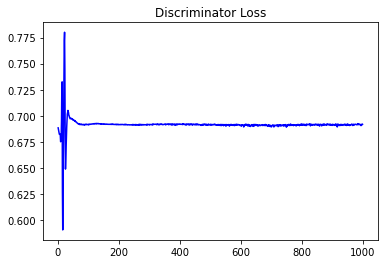

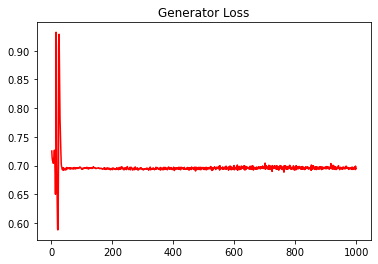

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.28647791589725907


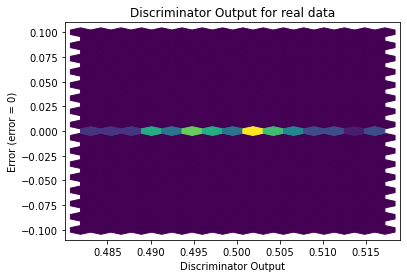

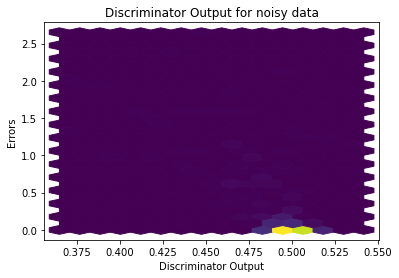

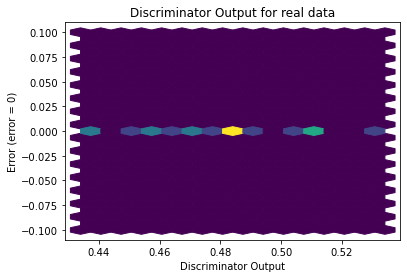

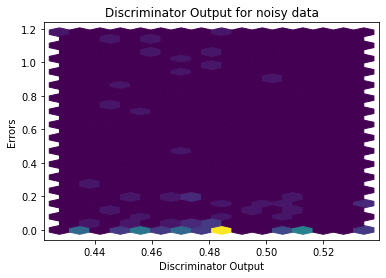

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


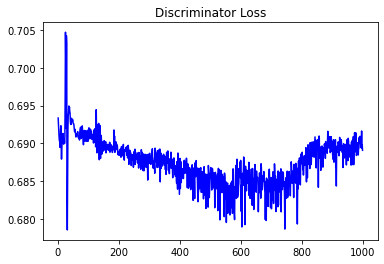

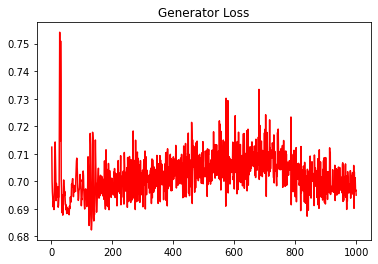

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.12886337193412375


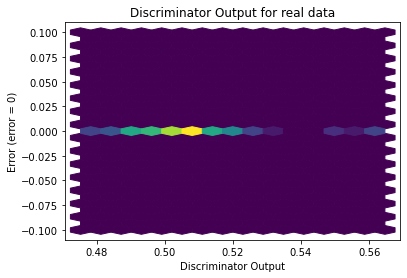

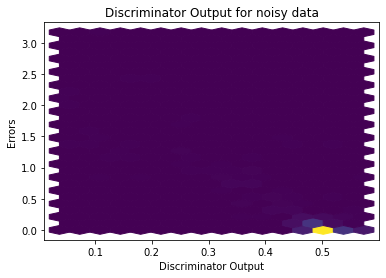

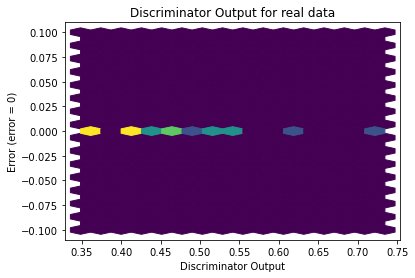

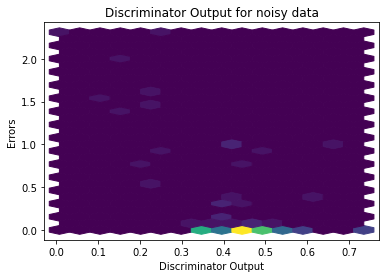

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3287]], requires_grad=True)
